<a href="https://colab.research.google.com/github/Shiv12GitHub39G/PCS-221/blob/main/Cloud_Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 - You are a data analyst at an e-commerce company. Your task isto analyze sales data,
clean and process it, perform statistical analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number asthe random seed to generate unique data for each student.
2. Follow the questions step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
• Well-documented code and clear comments.
• Markdown explanationsfor each step.
• Screenshots of the plots and outputs.

Part I: Randomized Sales Data Generation (NumPy)
1. Initialize Random Seed
2. Generate Sales Data
• Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
• Electronics, Clothing, Home & Kitchen, Sports.
• Sales valuesshould be between 1000 and 5000 units per month.
• The range should be randomized using the seed.
3. Convert to DataFrame
• Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Monthsfrom Jan to Dec

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd



Adjust the `roll_number` by taking its modulo with 2**32 to fit the valid range for `np.random.seed()` and then set the random seed.

In [ ]:
roll_number = 8025320090 # The original roll number is retrieved from the kernel state
valid_seed = roll_number % (2**32)
np.random.seed(valid_seed)
print(f"Original roll number: {roll_number}")
print(f"Adjusted roll number for seed: {valid_seed}")
print("Numpy random seed set successfully.")

Original roll number: 8025320090
Adjusted roll number for seed: 3730352794
Numpy random seed set successfully.


## Part I: Randomized Sales Data Generation

1. The random seed was initialized using the roll number to ensure reproducibility.
2. A NumPy array of shape (12, 4) was generated to represent monthly sales.
3. Sales values range between 1000 and 5000 units.
4. The array was converted into a Pandas DataFrame.
5. Columns represent product categories:
   - Electronics
   - Clothing
   - Home & Kitchen
   - Sports
6. Rows represent months from January to December.


In [ ]:
# Sales range: 1000 to 5000 units (inclusive)

sales_data = np.random.randint(1000, 5001, size=(12, 4))

print("Raw Sales Data (NumPy Array):\n")
print(sales_data)


Raw Sales Data (NumPy Array):

[[4923 2589 2006 1567]
 [4178 2126 3909 2342]
 [2854 2184 1880 3537]
 [1488 4724 2830 1848]
 [4029 1199 2771 4609]
 [3039 1071 1844 2909]
 [3397 3007 3027 3673]
 [2731 2479 4395 2340]
 [3899 3398 4475 2950]
 [2780 4760 2028 2984]
 [1732 1854 2437 2818]
 [3170 4157 3565 1506]]


In [ ]:
# Define column names (Product Categories)
columns = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

# Define index (Months)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Create DataFrame
sales_df = pd.DataFrame(sales_data, columns=columns, index=months)

print("\nSales Data as Pandas DataFrame:\n")
sales_df



Sales Data as Pandas DataFrame:



,Electronics,Clothing,Home & Kitchen,Sports
Jan,4923,2589,2006,1567
Feb,4178,2126,3909,2342
Mar,2854,2184,1880,3537
Apr,1488,4724,2830,1848
May,4029,1199,2771,4609
Jun,3039,1071,1844,2909
Jul,3397,3007,3027,3673
Aug,2731,2479,4395,2340
Sep,3899,3398,4475,2950
Oct,2780,4760,2028,2984


## PART II – Data Manipulation and Analysis (Pandas)
1. Display the first 5 rows and summary statistics of the DataFrame.
2. Calculate the totalsales per category and totalsales per month.
3. Calculate the average sales growth between consecutive monthsfor each category.
4. Add the following columns to the DataFrame:
• Total Sales: Sum of all categories per month.
• Growth Rate: Percentage change in Total Salesfrom the previous month.
5. Apply a randomized discount:
• If your roll number is even, apply a 10% discount to the Electronics category.
• If odd, apply a 15% discount to the Clothing category

In [ ]:
# Display first 5 rows
print("First 5 Rows of Sales Data:\n")
display(sales_df.head())

# Display summary statistics
print("\nSummary Statistics:\n")
display(sales_df.describe())


First 5 Rows of Sales Data:



,Electronics,Clothing,Home & Kitchen,Sports
Jan,4923,2589,2006,1567
Feb,4178,2126,3909,2342
Mar,2854,2184,1880,3537
Apr,1488,4724,2830,1848
May,4029,1199,2771,4609



Summary Statistics:



,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,3185.000000,2795.666667,2930.583333,2756.916667
std,989.307839,1250.959801,959.731351,911.864170
min,1488.000000,1071.000000,1844.000000,1506.000000
25%,2767.750000,2058.000000,2022.500000,2217.000000
50%,3104.500000,2534.000000,2800.500000,2863.500000
75%,3931.500000,3587.750000,3651.000000,3122.250000
max,4923.000000,4760.000000,4475.000000,4609.000000


In [ ]:
# Total sales per category (column-wise sum)
total_per_category = sales_df.sum()

print("Total Sales per Category:\n")
display(total_per_category)

# Total sales per month (row-wise sum)
total_per_month = sales_df.sum(axis=1)

print("\nTotal Sales per Month:\n")
display(total_per_month)


Total Sales per Category:



,0
Electronics,38220
Clothing,33548
Home & Kitchen,35167
Sports,33083



Total Sales per Month:



,0
Jan,11085
Feb,12555
Mar,10455
Apr,10890
May,12608
Jun,8863
Jul,13104
Aug,11945
Sep,14722
Oct,12552


## Average Sales Growth Between Consecutive Months (Per Category)

In [ ]:
# To find percentage change month-to-month for each category
monthly_growth = sales_df.pct_change() * 100

print("Monthly Growth (%) for Each Category:\n")
display(monthly_growth)

# To find average growth rate for each category
average_growth = monthly_growth.mean()

print("\nAverage Sales Growth (%) per Category:\n")
display(average_growth)


Monthly Growth (%) for Each Category:



,Electronics,Clothing,Home & Kitchen,Sports
Jan,NaN,NaN,NaN,NaN
Feb,-15.133049,-17.883353,94.865404,49.457562
Mar,-31.689804,2.728128,-51.905858,51.024765
Apr,-47.862649,116.300366,50.531915,-47.752332
May,170.766129,-74.618967,-2.084806,149.404762
Jun,-24.571854,-10.675563,-33.453627,-36.884357
Jul,11.780191,180.765640,64.154013,26.263321
Aug,-19.605534,-17.559029,45.193261,-36.291860
Sep,42.768217,37.071400,1.820250,26.068376
Oct,-28.699667,40.082401,-54.681564,1.152542



Average Sales Growth (%) per Category:



,0
Electronics,9.370868
Clothing,29.034410
Home & Kitchen,16.444823
Sports,11.847449


## Add New Columns to DataFrame

In [ ]:
# Add Total Sales column
sales_df["Total Sales"] = sales_df.sum(axis=1)


In [ ]:
# Calculate percentage growth of Total Sales
sales_df["Growth Rate (%)"] = sales_df["Total Sales"].pct_change() * 100

print("Updated DataFrame with New Columns:\n")
display(sales_df)


Updated DataFrame with New Columns:



,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate (%)
Jan,4923,2589,2006,1567,11085,NaN
Feb,4178,2126,3909,2342,12555,13.261164
Mar,2854,2184,1880,3537,10455,-16.726404
Apr,1488,4724,2830,1848,10890,4.160689
May,4029,1199,2771,4609,12608,15.775941
Jun,3039,1071,1844,2909,8863,-29.703363
Jul,3397,3007,3027,3673,13104,47.850615
Aug,2731,2479,4395,2340,11945,-8.844628
Sep,3899,3398,4475,2950,14722,23.248221
Oct,2780,4760,2028,2984,12552,-14.739845


## Apply Randomized Discount (Based on Roll Number = 8025320090)

In [ ]:
# Apply discount based on roll number
if roll_number % 2 == 0:
    # Even roll number → 10% discount on Electronics
    sales_df["Electronics"] = sales_df["Electronics"] * 0.90
    print("10% discount applied to Electronics category.")
else:
    # Odd roll number → 15% discount on Clothing
    sales_df["Clothing"] = sales_df["Clothing"] * 0.85
    print("15% discount applied to Clothing category.")

print("\nDisplaying Data After Applying Discount:\n")
display(sales_df)


10% discount applied to Electronics category.

Displaying Data After Applying Discount:



,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate (%)
Jan,4430.7,2589,2006,1567,11085,NaN
Feb,3760.2,2126,3909,2342,12555,13.261164
Mar,2568.6,2184,1880,3537,10455,-16.726404
Apr,1339.2,4724,2830,1848,10890,4.160689
May,3626.1,1199,2771,4609,12608,15.775941
Jun,2735.1,1071,1844,2909,8863,-29.703363
Jul,3057.3,3007,3027,3673,13104,47.850615
Aug,2457.9,2479,4395,2340,11945,-8.844628
Sep,3509.1,3398,4475,2950,14722,23.248221
Oct,2502.0,4760,2028,2984,12552,-14.739845


## PART III – Visualizations (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
• Box plots to show the sales distribution for each category.

## Purpose of drawing Line plot and Box Plot
1. Line Plot:
   - Displays monthly sales trends for each product category.
   - Helps identify patterns, peaks, and seasonal variations.

2. Box Plot:
   - Shows distribution of sales values.
   - Highlights median, quartiles, and possible outliers.
   - Useful for comparing variability across categories.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot appearance
sns.set(style="whitegrid")

# Optional: Increase figure size globally
plt.rcParams["figure.figsize"] = (10, 6)


## Displaying Line Plot – Monthly Sales Trends for Each Category

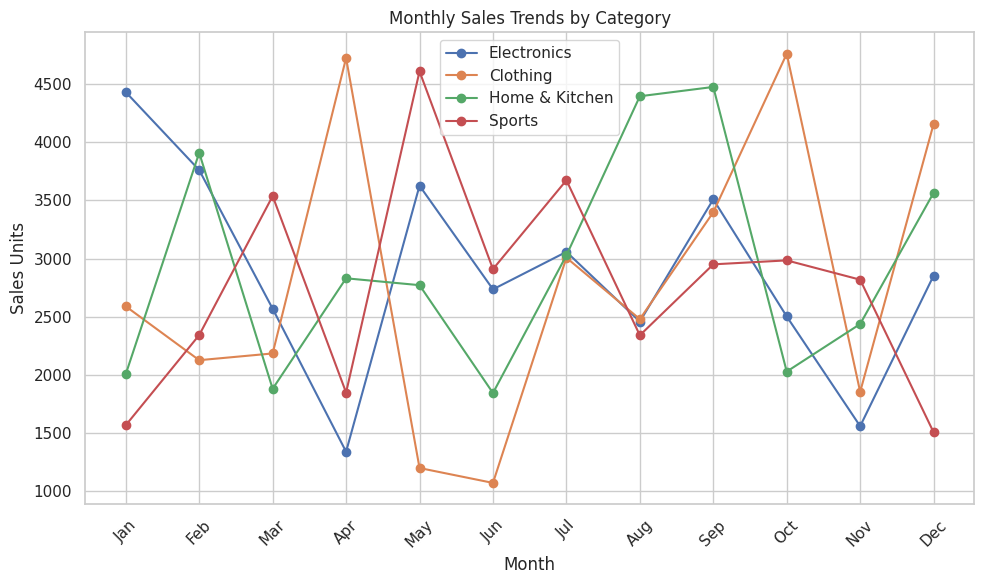

In [ ]:
# Line plot for monthly sales trends

plt.figure()

for column in ["Electronics", "Clothing", "Home & Kitchen", "Sports"]:
    plt.plot(sales_df.index, sales_df[column], marker='o', label=column)

plt.title("Monthly Sales Trends by Category")
plt.xlabel("Month")
plt.ylabel("Sales Units")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Displaying Box Plot – Sales Distribution for Each Category

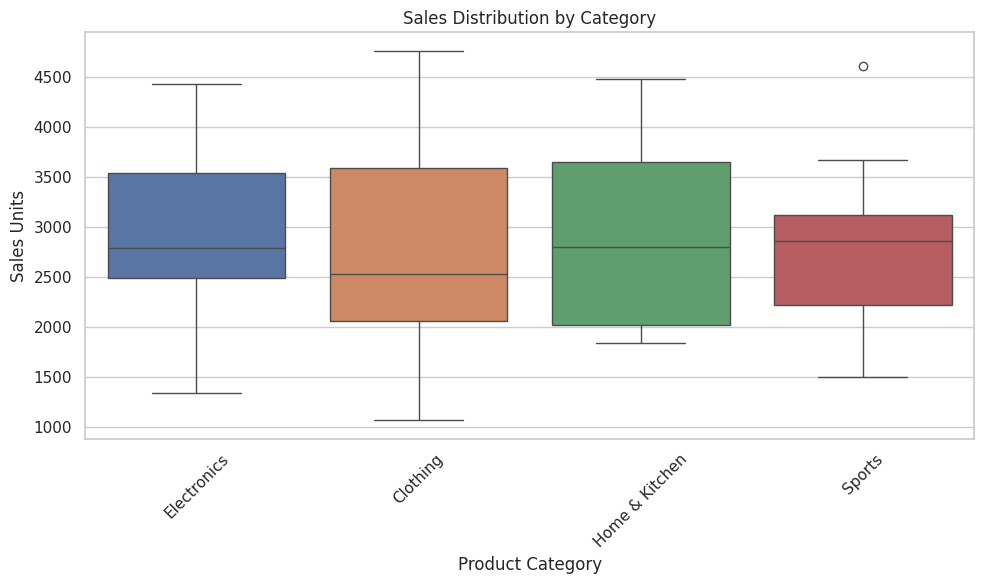

In [ ]:
# Box plot to show sales distribution

plt.figure()

sns.boxplot(data=sales_df[["Electronics", "Clothing",
                           "Home & Kitchen", "Sports"]])

plt.title("Sales Distribution by Category")
plt.xlabel("Product Category")
plt.ylabel("Sales Units")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percentile of flattened array, for each column, for each
row.
iii. Mean, Median and Standard Deviation of flattened array, of each column, and
each row

In [ ]:
import numpy as np

array = np.array([[1, -2, 3],
                  [-4, 5, -6]])

print("Original Array:\n", array)


Original Array:
 [[ 1 -2  3]
 [-4  5 -6]]


In [ ]:
# Element-wise absolute value
abs_array = np.abs(array)

print("Element-wise Absolute Value:\n")
print(abs_array)


Element-wise Absolute Value:

[[1 2 3]
 [4 5 6]]


In [ ]:
# Flatten the array
flattened = array.flatten()

percentiles_flat = np.percentile(flattened, [25, 50, 75])

print("Percentiles (Flattened Array):")
print("25th, 50th, 75th:", percentiles_flat)


Percentiles (Flattened Array):
25th, 50th, 75th: [-3.5 -0.5  2.5]


In [ ]:
percentiles_columns = np.percentile(array, [25, 50, 75], axis=0)

print("\nPercentiles (Each Column):")
print("25th, 50th, 75th:\n", percentiles_columns)



Percentiles (Each Column):
25th, 50th, 75th:
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]


In [ ]:
percentiles_rows = np.percentile(array, [25, 50, 75], axis=1)

print("\nPercentiles (Each Row):")
print("25th, 50th, 75th:\n", percentiles_rows)



Percentiles (Each Row):
25th, 50th, 75th:
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]


In [ ]:
print("\nStatistics (Flattened Array):")
print("Mean:", np.mean(flattened))
print("Median:", np.median(flattened))
print("Standard Deviation:", np.std(flattened))



Statistics (Flattened Array):
Mean: -0.5
Median: -0.5
Standard Deviation: 3.8622100754188224


In [ ]:
print("\nStatistics (Each Column):")
print("Mean:", np.mean(array, axis=0))
print("Median:", np.median(array, axis=0))
print("Standard Deviation:", np.std(array, axis=0))



Statistics (Each Column):
Mean: [-1.5  1.5 -1.5]
Median: [-1.5  1.5 -1.5]
Standard Deviation: [2.5 3.5 4.5]


In [ ]:
print("\nStatistics (Each Row):")
print("Mean:", np.mean(array, axis=1))
print("Median:", np.median(array, axis=1))
print("Standard Deviation:", np.std(array, axis=1))



Statistics (Each Row):
Mean: [ 0.66666667 -1.66666667]
Median: [ 1. -4.]
Standard Deviation: [2.05480467 4.78423336]


## Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
i. Find floor, ceiling and truncated value,rounded values

In [ ]:
import numpy as np

a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

print("Original Array:")
print(a)


Original Array:
[-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]


In [ ]:
floor_values = np.floor(a)
print("\nFloor Values:")
print(floor_values)



Floor Values:
[-2. -2. -1.  0.  1.  1.  3.]


In [ ]:
ceiling_values = np.ceil(a)
print("\nCeiling Values:")
print(ceiling_values)



Ceiling Values:
[-1. -1. -0.  1.  2.  2.  3.]


In [ ]:
truncated_values = np.trunc(a)
print("\nTruncated Values:")
print(truncated_values)



Truncated Values:
[-1. -1. -0.  0.  1.  1.  3.]


In [ ]:
rounded_values = np.round(a)
print("\nRounded Values:")
print(rounded_values)



Rounded Values:
[-2. -2. -0.  0.  2.  2.  3.]


## Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [ ]:
# Input list
my_list = [10, 20, 32, 40, 50, 76, 87]

print("Original List:", my_list)

# Positions to swap (example: swap index 1 and index 3)
pos1 = 1
pos2 = 6

# Using temporary variable to swap
temp = my_list[pos1]
my_list[pos1] = my_list[pos2]
my_list[pos2] = temp

print("List After Swapping 2 Elements:", my_list)


Original List: [10, 20, 32, 40, 50, 76, 87]
List After Swapping 2 Elements: [10, 87, 32, 40, 50, 76, 20]


## Q.5 Write a Python program to swap two elementsin a set by converting it to a list first.

In [ ]:
# Original set
my_set = {12, 65, 73, 89, 23, 62, 17, 47}
# sets do not support indexing so swapping directly not possible on set.

print("Original Set:", my_set) # Sets are Unordered

# Convert set to list
my_list = list(my_set)

print("Converted List:", my_list)

# Positions to swap (example: index 1 and index 3)
pos1 = 1
pos2 = 3

# Swap using temporary variable
temp = my_list[pos1]
my_list[pos1] = my_list[pos2]
my_list[pos2] = temp

# Convert list back to set
my_set = set(my_list)

print("Set After Swapping:", my_set)


Original Set: {65, 73, 12, 47, 17, 23, 89, 62}
Converted List: [65, 73, 12, 47, 17, 23, 89, 62]
Set After Swapping: {65, 73, 12, 47, 17, 23, 89, 62}
